In [ ]:
!pip install tensorly
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 9.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=612ae4e273b8bdd985f8e95d2da3d9e5a871395348dcd315a93ed0602cd4db47
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from tensorly.decomposition import parafac
from tensorly.decomposition import non_negative_parafac

# Load your data
methylation_df = pd.read_excel('/content/drive/MyDrive/Methylation_ENCODER.xlsx').set_index('attrib_name')
rnaseq_df = pd.read_excel('/content/drive/MyDrive/RNAseq_ENCODER.xlsx').set_index('attrib_name')
mirna_df = pd.read_excel('/content/drive/MyDrive/miRNASeq_ENCODER.xlsx').set_index('attrib_name')
image_df = pd.read_csv('/content/drive/MyDrive/all_images_BRAC_128_filtered.csv').set_index('attrib_name')

# Join dataframes based on the index
merged_data = methylation_df.join([rnaseq_df, mirna_df, image_df], how='inner')

# Extract aligned datasets
methylation_data_aligned = merged_data[methylation_df.columns].to_numpy()
rnaseq_data_aligned = merged_data[rnaseq_df.columns].to_numpy()
mirna_data_aligned = merged_data[mirna_df.columns].to_numpy()
image_data_aligned = merged_data[image_df.columns].to_numpy()

# Create the 3D tensor
multi_omics_tensor = np.array([methylation_data_aligned, rnaseq_data_aligned, mirna_data_aligned, image_data_aligned], dtype=object)

# Reorder the tensor
multi_omics_tensor_transposed = np.transpose(multi_omics_tensor, (1, 0, 2))
multi_omics_tensor_transposed = multi_omics_tensor_transposed.astype(np.float64)

# Store the indexes
sample_indexes = merged_data.index.tolist()

print(multi_omics_tensor_transposed.shape)
print(sample_indexes)


(622, 4, 128)
['TCGA.3C.AAAU', 'TCGA.3C.AAAU', 'TCGA.3C.AALI', 'TCGA.3C.AALJ', 'TCGA.3C.AALK', 'TCGA.4H.AAAK', 'TCGA.5L.AAT0', 'TCGA.5L.AAT1', 'TCGA.5T.A9QA', 'TCGA.A1.A0SB', 'TCGA.A1.A0SF', 'TCGA.A1.A0SG', 'TCGA.A1.A0SI', 'TCGA.A1.A0SN', 'TCGA.A1.A0SQ', 'TCGA.A2.A0CK', 'TCGA.A2.A0CO', 'TCGA.A2.A0CR', 'TCGA.A2.A0EP', 'TCGA.A2.A1FV', 'TCGA.A2.A1FW', 'TCGA.A2.A1FX', 'TCGA.A2.A1FZ', 'TCGA.A2.A1G0', 'TCGA.A2.A1G1', 'TCGA.A2.A1G4', 'TCGA.A2.A1G6', 'TCGA.A2.A259', 'TCGA.A2.A25A', 'TCGA.A2.A25B', 'TCGA.A2.A25C', 'TCGA.A2.A25D', 'TCGA.A2.A25E', 'TCGA.A2.A25F', 'TCGA.A2.A3KC', 'TCGA.A2.A3KD', 'TCGA.A2.A3XS', 'TCGA.A2.A3XT', 'TCGA.A2.A3XU', 'TCGA.A2.A3XV', 'TCGA.A2.A3XW', 'TCGA.A2.A3XX', 'TCGA.A2.A3XY', 'TCGA.A2.A3XZ', 'TCGA.A2.A3Y0', 'TCGA.A2.A4RW', 'TCGA.A2.A4RX', 'TCGA.A2.A4RY', 'TCGA.A2.A4S0', 'TCGA.A2.A4S1', 'TCGA.A2.A4S2', 'TCGA.A2.A4S3', 'TCGA.A7.A13D', 'TCGA.A7.A13E', 'TCGA.A7.A13F', 'TCGA.A7.A13G', 'TCGA.A7.A13H', 'TCGA.A7.A26E', 'TCGA.A7.A26F', 'TCGA.A7.A26G', 'TCGA.A7.A26H', 'TCGA.A7.

In [ ]:


# CP decomposition
rank = 3 # the rank of CP decomposition, which can be motified
factors = parafac(multi_omics_tensor_transposed, rank=rank)

print(factors)

# obtain weights and factors
weights = factors[0]
factor_matrices = factors[1]  # This is a list that contains 3 factors array

# patient’s mode
patient_mode_matrix = factor_matrices[0]
print(patient_mode_matrix.shape)
# omics feature mode
omics_feature_mode_matrix = factor_matrices[1]
print(omics_feature_mode_matrix.shape)
# genes mode
genes_mode_matrix = factor_matrices[2]
print(genes_mode_matrix.shape)

(weights, factors) : rank-3 CPTensor of shape (622, 4, 128)
(622, 3)
(4, 3)
(128, 3)


In [ ]:
# Convert patient_mode_matrix to a DataFrame with index
patient_df = pd.DataFrame(patient_mode_matrix, index=sample_indexes)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from sklearn.model_selection import train_test_split
from lifelines import KaplanMeierFitter
from scipy.cluster.hierarchy import linkage, fcluster

# 1. import clinical.xlsx
data_methylation = pd.read_excel('/content/drive/MyDrive/Methylation_ENCODER.xlsx')
data_clinical = pd.read_excel('/content/drive/MyDrive/Clinical.xlsx')
selected_samples = data_methylation.iloc[:, 0].unique()
data = data_clinical[data_clinical['attrib_name'].isin(selected_samples)]


# 1. Delete columns in “overall_survival” and “status” that contains "NA"
data = data.dropna(subset=['overall_survival', 'status'])

# 2. Change "NA" in numerical attributes to 0
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(0)

# 3. Change "NA" in character attributes to "No value"
text_cols = data.select_dtypes(include=['object']).columns
data[text_cols] = data[text_cols].fillna('No value')



# Merge the two dataframes on the 'attrib_name' column and the index of patient_df
merged_data = pd.merge(data, patient_df, left_on='attrib_name', right_index=True)

# The result will be a dataframe where each row contains both the clinical data and the corresponding patient_mode_matrix values.



In [ ]:
merged_data
count_status = merged_data['status'].value_counts()
print(count_status)

0.0    534
1.0     79
Name: status, dtype: int64


In [ ]:
merged_data

,attrib_name,years_to_birth,Tumor_purity,pathologic_stage,pathology_T_stage,pathology_N_stage,pathology_M_stage,histological_type,number_of_lymph_nodes,PAM50,...,radiation_therapy,race,ethnicity,Median_overall_survival,overall_survival,status,overallsurvival,0,1,2
0,TCGA.LD.A9QF,73.0,0.1497,stagei,t1,n0,m0,infiltratingductalcarcinoma,0.0,No value,...,no,blackorafricanamerican,nothispanicorlatino,0.0,323.0,0.0,"323,0",12.365717,10.681247,2.603273e-16
2,TCGA.E9.A5FK,60.0,0.2308,stageiii,t2,n3,m0,infiltratinglobularcarcinoma,10.0,No value,...,yes,white,nothispanicorlatino,0.0,812.0,0.0,"812,0",16.571607,10.394797,5.458103e-16
3,TCGA.A2.A25F,66.0,0.2489,stageii,t2,n0,m0,infiltratingductalcarcinoma,0.0,Basal,...,yes,white,nothispanicorlatino,0.0,322.0,0.0,"322,0",13.880084,10.394076,-2.649198e-16
7,TCGA.E9.A2JT,63.0,0.3275,stageii,t2,n0,m0,infiltratinglobularcarcinoma,0.0,LumA,...,yes,white,nothispanicorlatino,0.0,288.0,0.0,"288,0",17.216624,9.910138,5.696426e-16
9,TCGA.LL.A5YO,50.0,0.3351,stagei,t1,n0,No value,infiltratingductalcarcinoma,0.0,Her2,...,yes,blackorafricanamerican,nothispanicorlatino,0.0,440.0,0.0,"440,0",13.430628,10.586591,-2.210138e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,TCGA.AC.A6IX,49.0,0.0000,stageiii,t2,n3,No value,infiltratinglobularcarcinoma,19.0,No value,...,yes,white,nothispanicorlatino,0.0,373.0,0.0,"373,0",14.808780,10.959866,4.862482e-16
1091,TCGA.BH.A1ES,35.0,0.0000,stageii,t2,n1,m0,infiltratingductalcarcinoma,1.0,LumA,...,No value,white,nothispanicorlatino,0.0,3462.0,1.0,"3462,1",17.492162,10.588301,-2.677001e-16
1092,TCGA.BH.A1FE,31.0,0.0000,stageii,t2,n1,m0,infiltratingductalcarcinoma,1.0,LumA,...,No value,white,nothispanicorlatino,0.0,2273.0,1.0,"2273,1",14.781907,8.039693,-1.361963e-16
1095,TCGA.E2.A15K,58.0,0.0000,stageii,t2,n1,m0,infiltratingductalcarcinoma,2.0,LumB,...,yes,white,nothispanicorlatino,0.0,275.0,0.0,"275,0",17.362823,10.681559,-3.193366e-16


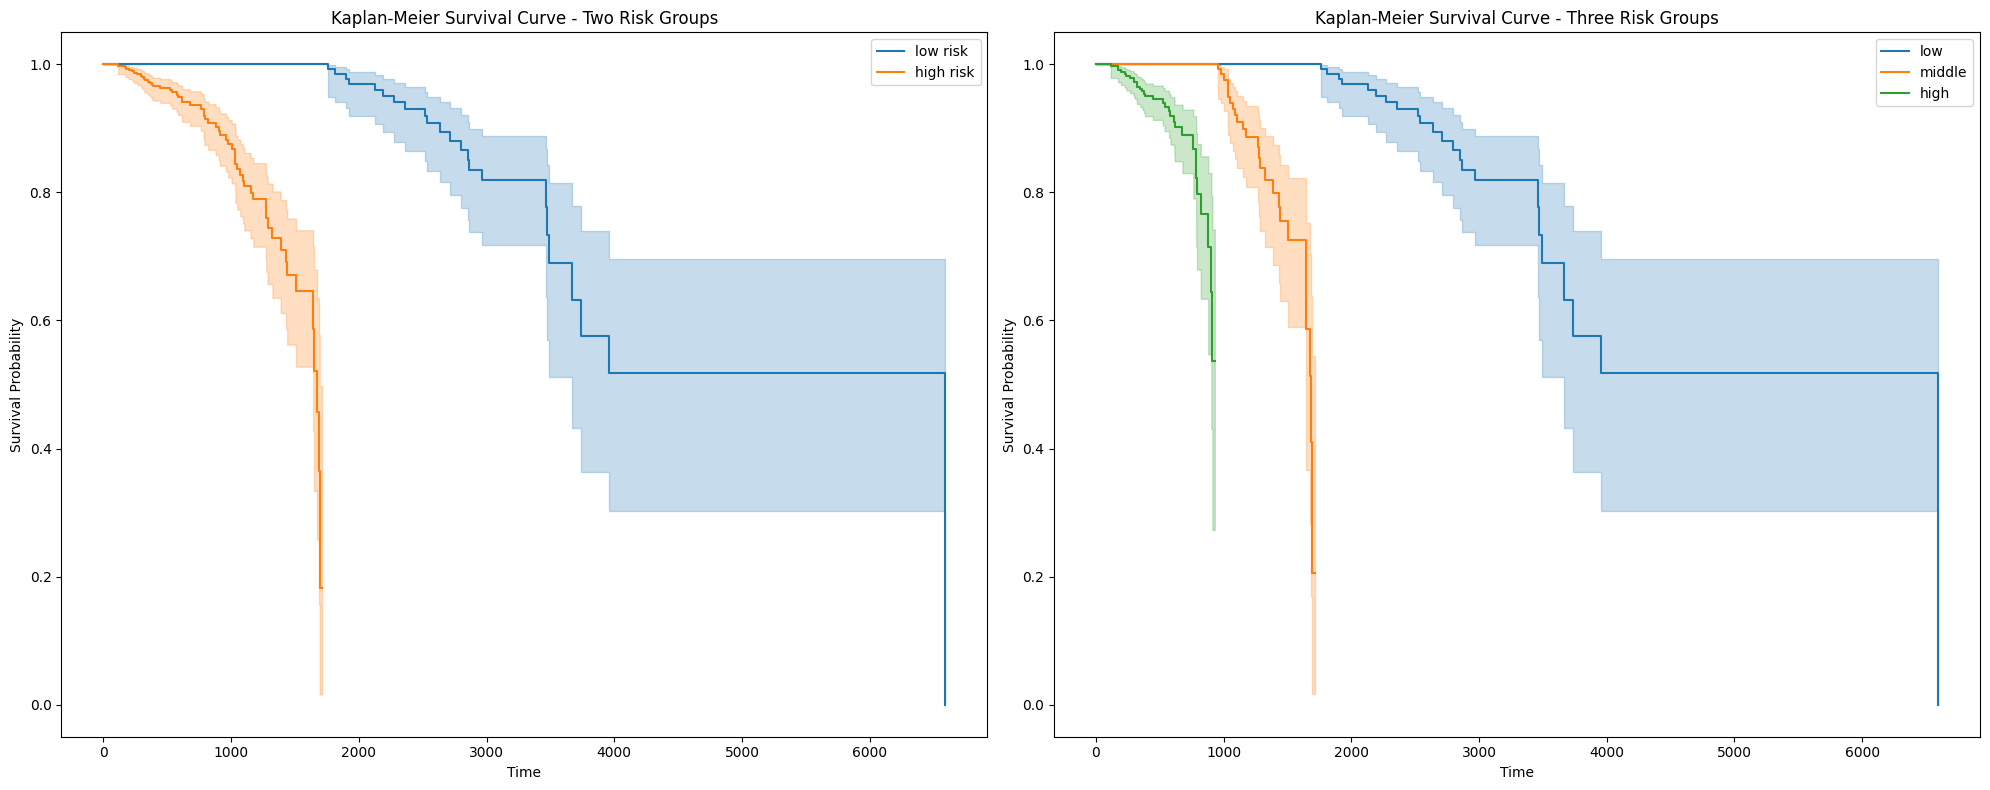

In [ ]:
#In this process, because the dataframe contains overall_survival and status, Which causes overfitting, so the model performs very well

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from lifelines import KaplanMeierFitter


numeric_data = merged_data.select_dtypes(include=[np.number])


linked = linkage(numeric_data, 'ward')

# bulid 2 and 3 risk groups
label_2_clusters = fcluster(linked, 2, criterion='maxclust')
label_3_clusters = fcluster(linked, 3, criterion='maxclust')

# copy merged_data to processed_data
processed_data = merged_data.copy()

# add labels to the new dataframe
processed_data['risk_group_2'] = label_2_clusters
processed_data['risk_group_3'] = label_3_clusters


kmf = KaplanMeierFitter()

# apply Kaplan-Meier survival analyse for 2 risk groups
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
risk_labels_2 = {1: "low risk", 2: "high risk"}
for label in np.unique(label_2_clusters):
    mask = processed_data['risk_group_2'] == label
    group_data = processed_data[mask]

    kmf.fit(group_data['overall_survival'], event_observed=group_data['status'], label=risk_labels_2[label])
    kmf.plot(ax=plt.gca())

plt.title('Kaplan-Meier Survival Curve - Two Risk Groups')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

# apply Kaplan-Meier survival analyse for 3 risk groups
plt.subplot(1, 2, 2)
risk_labels_3 = {1: "low", 2: "middle", 3: "high"}
for label in np.unique(label_3_clusters):
    mask = processed_data['risk_group_3'] == label
    group_data = processed_data[mask]

    kmf.fit(group_data['overall_survival'], event_observed=group_data['status'], label=risk_labels_3[label])
    kmf.plot(ax=plt.gca())

plt.title('Kaplan-Meier Survival Curve - Three Risk Groups')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

plt.tight_layout()
plt.show()





In [ ]:

from lifelines.statistics import logrank_test

# Calculate P-value for 2 riks groups
group1 = processed_data[processed_data['risk_group_2'] == 1]
group2 = processed_data[processed_data['risk_group_2'] == 2]
results_2 = logrank_test(group1['overall_survival'], group2['overall_survival'], event_observed_A=group1['status'], event_observed_B=group2['status'])
p_value_2 = results_2.p_value
print(f"P-value for the difference between two risk groups: {p_value_2}")

# Calculate P-value for 3 riks groups
group1 = processed_data[processed_data['risk_group_3'] == 1]
group2 = processed_data[processed_data['risk_group_3'] == 2]
group3 = processed_data[processed_data['risk_group_3'] == 3]

results_3_12 = logrank_test(group1['overall_survival'], group2['overall_survival'], event_observed_A=group1['status'], event_observed_B=group2['status'])
results_3_13 = logrank_test(group1['overall_survival'], group3['overall_survival'], event_observed_A=group1['status'], event_observed_B=group3['status'])
results_3_23 = logrank_test(group2['overall_survival'], group3['overall_survival'], event_observed_A=group2['status'], event_observed_B=group3['status'])

print(f"P-value for the difference between risk groups 1 and 2: {results_3_12.p_value}")
print(f"P-value for the difference between risk groups 1 and 3: {results_3_13.p_value}")
print(f"P-value for the difference between risk groups 2 and 3: {results_3_23.p_value}")

P-value for the difference between two risk groups: 6.323643685667907e-17
P-value for the difference between risk groups 1 and 2: 1.0320350539768737e-16
P-value for the difference between risk groups 1 and 3: 3.053268735428492e-10
P-value for the difference between risk groups 2 and 3: 5.186983734185432e-10


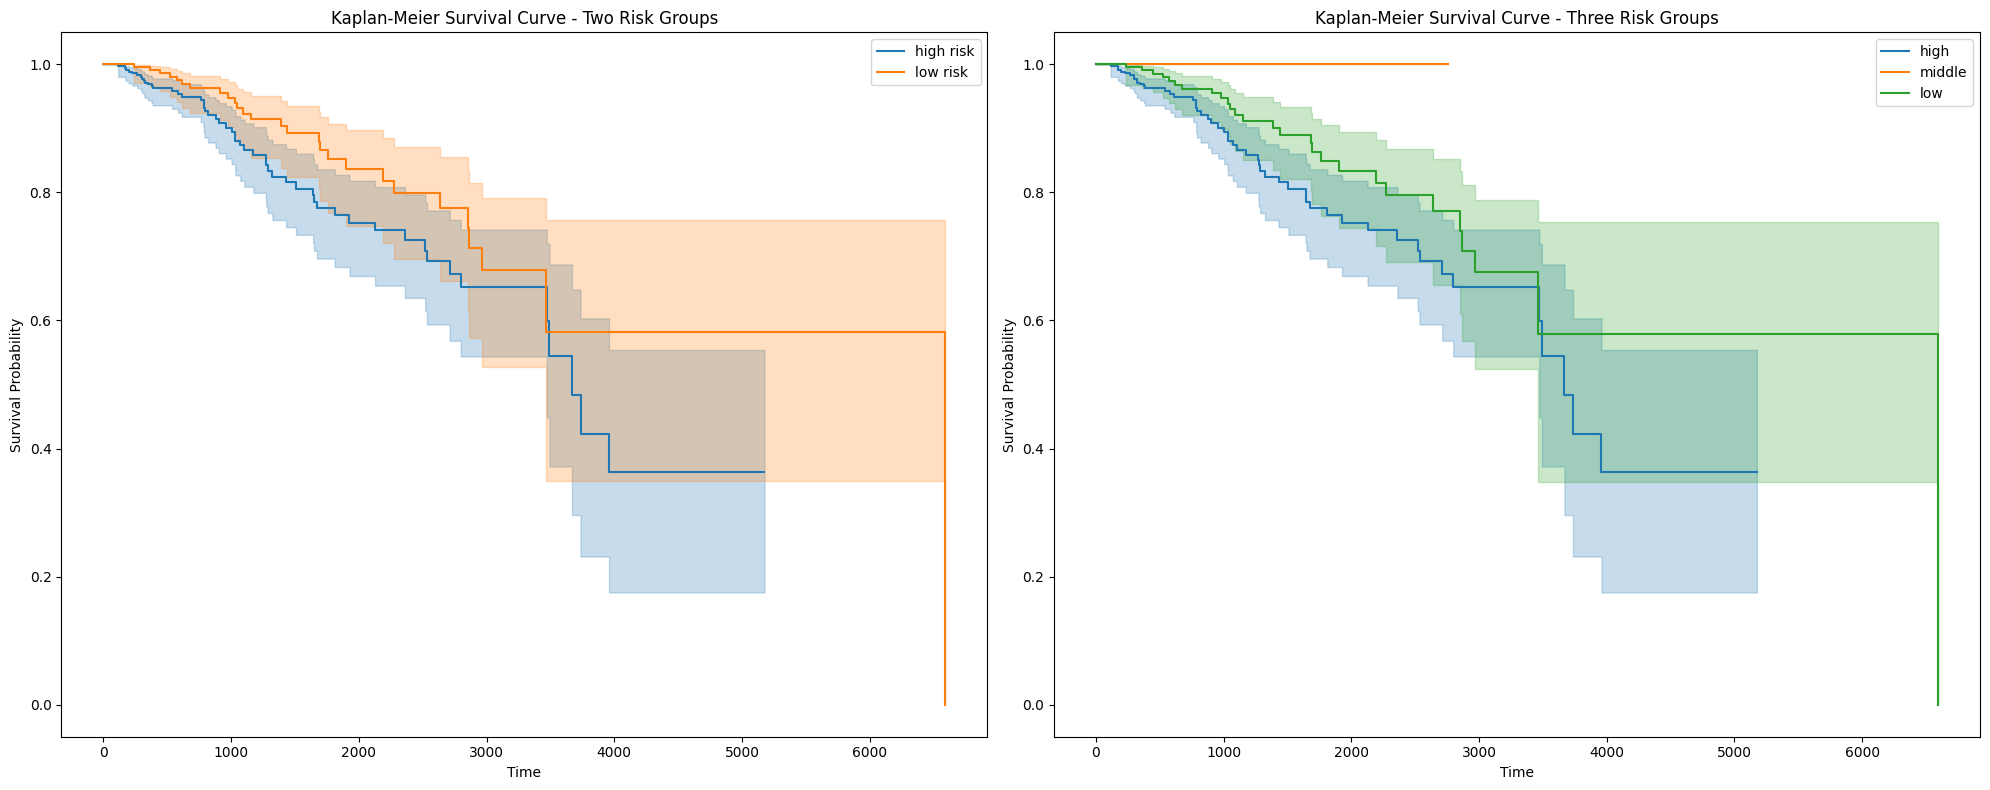

In [ ]:
# Based on the precious result, delete "overall_survival", 'status',"Median_overall_survival"
new_df = merged_data.drop(columns=['overall_survival', 'status',"Median_overall_survival"])
numeric_data_new = new_df.select_dtypes(include=[np.number])


linked = linkage(numeric_data_new, 'ward')


label_2_clusters = fcluster(linked, 2, criterion='maxclust')
label_3_clusters = fcluster(linked, 3, criterion='maxclust')

processed_data_new = merged_data.copy()


processed_data_new['risk_group_2'] = label_2_clusters
processed_data_new['risk_group_3'] = label_3_clusters


kmf = KaplanMeierFitter()

# apply Kaplan-Meier survival analyse for 2 risk groups
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
risk_labels_2 = {1: "high risk", 2: "low risk"}
for label in np.unique(label_2_clusters):
    mask = processed_data_new['risk_group_2'] == label
    group_data = processed_data_new[mask]

    kmf.fit(group_data['overall_survival'], event_observed=group_data['status'], label=risk_labels_2[label])
    kmf.plot(ax=plt.gca())

plt.title('Kaplan-Meier Survival Curve - Two Risk Groups')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

# apply Kaplan-Meier survival analyse for 3 risk groups
plt.subplot(1, 2, 2)
risk_labels_3 = {1: "high", 2: "middle", 3: "low"}
for label in np.unique(label_3_clusters):
    mask = processed_data_new['risk_group_3'] == label
    group_data = processed_data_new[mask]

    kmf.fit(group_data['overall_survival'], event_observed=group_data['status'], label=risk_labels_3[label])
    kmf.plot(ax=plt.gca())

plt.title('Kaplan-Meier Survival Curve - Three Risk Groups')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

plt.tight_layout()
plt.show()



In [ ]:
from lifelines.statistics import logrank_test

# Calculate P-value for 2 riks groups
group1 = processed_data_new[processed_data_new['risk_group_2'] == 1]
group2 = processed_data_new[processed_data_new['risk_group_2'] == 2]
results_2 = logrank_test(group1['overall_survival'], group2['overall_survival'], event_observed_A=group1['status'], event_observed_B=group2['status'])
p_value_2 = results_2.p_value
print(f"P-value for the difference between two risk groups: {p_value_2}")

# Calculate P-value for 3 riks groups
group1 = processed_data_new[processed_data_new['risk_group_3'] == 1]
group2 = processed_data_new[processed_data_new['risk_group_3'] == 2]
group3 = processed_data_new[processed_data_new['risk_group_3'] == 3]

results_3_12 = logrank_test(group1['overall_survival'], group2['overall_survival'], event_observed_A=group1['status'], event_observed_B=group2['status'])
results_3_13 = logrank_test(group1['overall_survival'], group3['overall_survival'], event_observed_A=group1['status'], event_observed_B=group3['status'])
results_3_23 = logrank_test(group2['overall_survival'], group3['overall_survival'], event_observed_A=group2['status'], event_observed_B=group3['status'])

print(f"P-value for the difference between risk groups 1 and 2: {results_3_12.p_value}")
print(f"P-value for the difference between risk groups 1 and 3: {results_3_13.p_value}")
print(f"P-value for the difference between risk groups 2 and 3: {results_3_23.p_value}")

P-value for the difference between two risk groups: 0.0615617758890038
P-value for the difference between risk groups 1 and 2: 0.31454631464156296
P-value for the difference between risk groups 1 and 3: 0.07664139173637556
P-value for the difference between risk groups 2 and 3: 0.4852958732557898


<ipython-input-13-3d1a8a98bbd4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['risk_group_2'] = label_2_clusters
<ipython-input-13-3d1a8a98bbd4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['risk_group_3'] = label_3_clusters


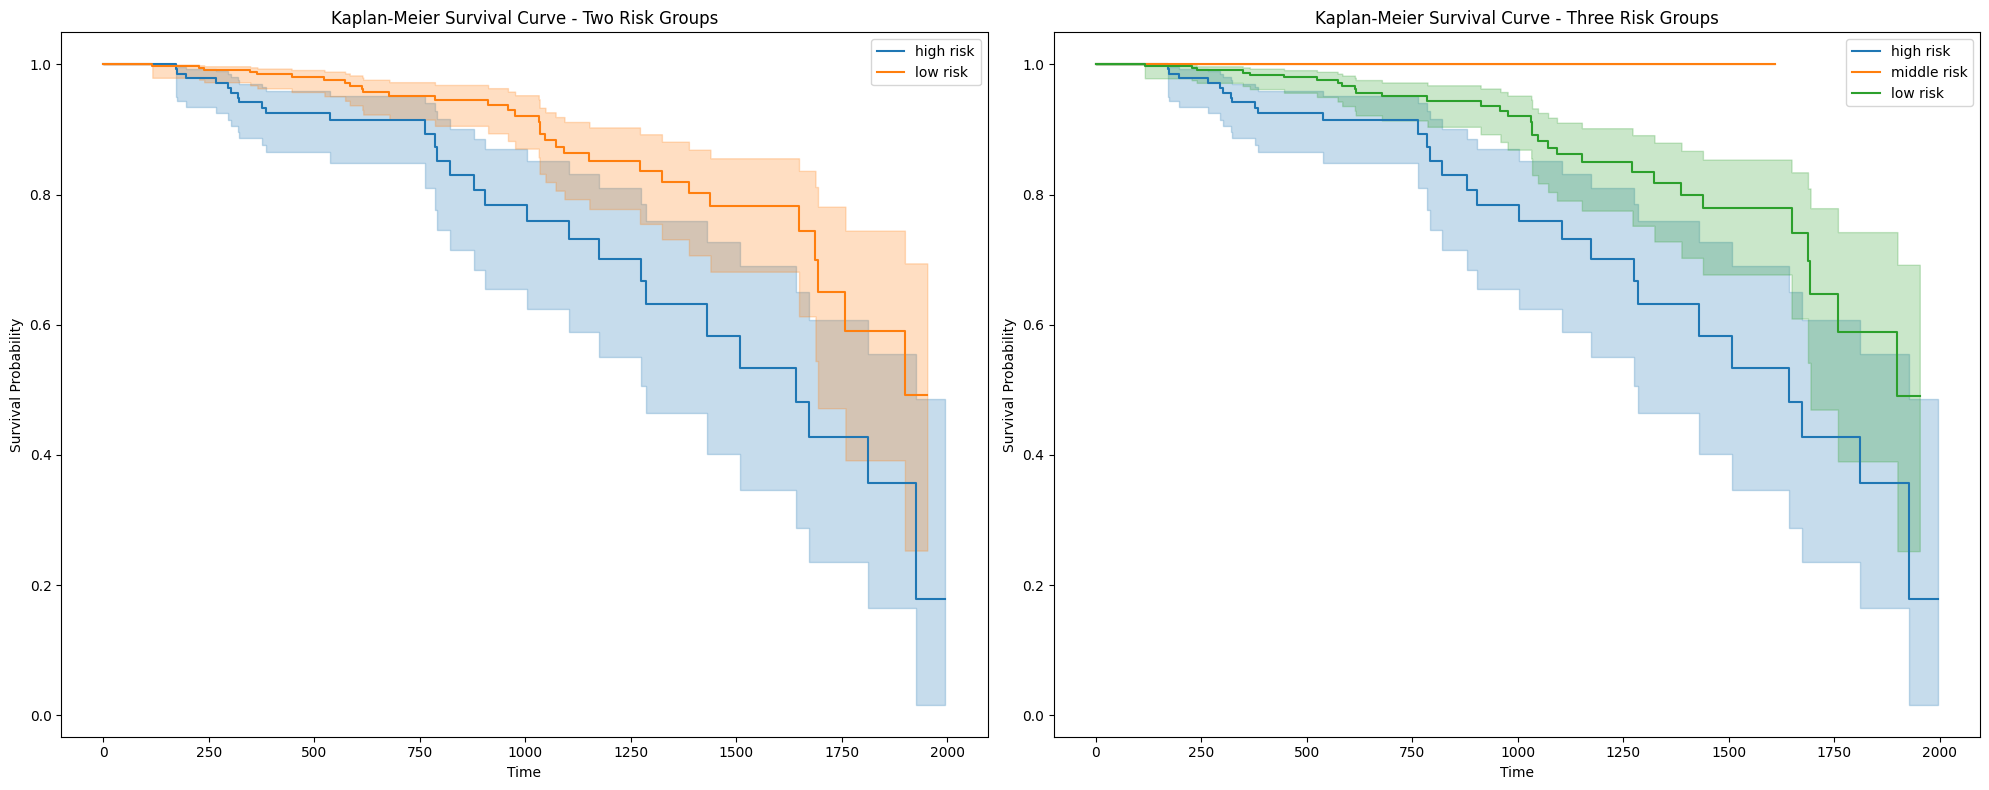

In [ ]:
#Because the average survival time for cancer pacient is around 2000 days, so we restrict the overall survival time to less than 2000 days.

filtered_df = merged_data[merged_data['overall_survival'] < 2000]



new_df = filtered_df.drop(columns=['overall_survival', 'status',"Median_overall_survival"])
numeric_data_new = new_df.select_dtypes(include=[np.number])


linked = linkage(numeric_data_new, 'ward')



label_2_clusters = fcluster(linked, 2, criterion='maxclust')
label_3_clusters = fcluster(linked, 3, criterion='maxclust')




filtered_df['risk_group_2'] = label_2_clusters
filtered_df['risk_group_3'] = label_3_clusters


kmf = KaplanMeierFitter()

# For 2 risk groups
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
risk_labels_2 = {1: "high risk", 2: "low risk"}
for label in np.unique(label_2_clusters):
    mask = filtered_df['risk_group_2'] == label
    group_data = filtered_df[mask]

    kmf.fit(group_data['overall_survival'], event_observed=group_data['status'], label=risk_labels_2[label])
    kmf.plot(ax=plt.gca())

plt.title('Kaplan-Meier Survival Curve - Two Risk Groups')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

# For 3 risk groups
plt.subplot(1, 2, 2)
risk_labels_3 = {1: "high risk", 2: "middle risk", 3: "low risk"}
for label in np.unique(label_3_clusters):
    mask = filtered_df['risk_group_3'] == label
    group_data = filtered_df[mask]

    kmf.fit(group_data['overall_survival'], event_observed=group_data['status'], label=risk_labels_3[label])
    kmf.plot(ax=plt.gca())

plt.title('Kaplan-Meier Survival Curve - Three Risk Groups')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

plt.tight_layout()
plt.show()


In [ ]:
from lifelines.statistics import logrank_test

# calculate p-value for 2 risk groups
group1 = filtered_df[filtered_df['risk_group_2'] == 1]
group2 = filtered_df[filtered_df['risk_group_2'] == 2]
results_2 = logrank_test(group1['overall_survival'], group2['overall_survival'], event_observed_A=group1['status'], event_observed_B=group2['status'])
p_value_2 = results_2.p_value
print(f"P-value : {p_value_2}")

P-value : 0.0005049232225941622


In [ ]:
merged_data

,attrib_name,years_to_birth,Tumor_purity,pathologic_stage,pathology_T_stage,pathology_N_stage,pathology_M_stage,histological_type,number_of_lymph_nodes,PAM50,...,radiation_therapy,race,ethnicity,Median_overall_survival,overall_survival,status,overallsurvival,0,1,2
0,TCGA.LD.A9QF,73.0,0.1497,stagei,t1,n0,m0,infiltratingductalcarcinoma,0.0,No value,...,no,blackorafricanamerican,nothispanicorlatino,0.0,323.0,0.0,"323,0",12.365717,10.681247,2.603273e-16
2,TCGA.E9.A5FK,60.0,0.2308,stageiii,t2,n3,m0,infiltratinglobularcarcinoma,10.0,No value,...,yes,white,nothispanicorlatino,0.0,812.0,0.0,"812,0",16.571607,10.394797,5.458103e-16
3,TCGA.A2.A25F,66.0,0.2489,stageii,t2,n0,m0,infiltratingductalcarcinoma,0.0,Basal,...,yes,white,nothispanicorlatino,0.0,322.0,0.0,"322,0",13.880084,10.394076,-2.649198e-16
7,TCGA.E9.A2JT,63.0,0.3275,stageii,t2,n0,m0,infiltratinglobularcarcinoma,0.0,LumA,...,yes,white,nothispanicorlatino,0.0,288.0,0.0,"288,0",17.216624,9.910138,5.696426e-16
9,TCGA.LL.A5YO,50.0,0.3351,stagei,t1,n0,No value,infiltratingductalcarcinoma,0.0,Her2,...,yes,blackorafricanamerican,nothispanicorlatino,0.0,440.0,0.0,"440,0",13.430628,10.586591,-2.210138e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,TCGA.AC.A6IX,49.0,0.0000,stageiii,t2,n3,No value,infiltratinglobularcarcinoma,19.0,No value,...,yes,white,nothispanicorlatino,0.0,373.0,0.0,"373,0",14.808780,10.959866,4.862482e-16
1091,TCGA.BH.A1ES,35.0,0.0000,stageii,t2,n1,m0,infiltratingductalcarcinoma,1.0,LumA,...,No value,white,nothispanicorlatino,0.0,3462.0,1.0,"3462,1",17.492162,10.588301,-2.677001e-16
1092,TCGA.BH.A1FE,31.0,0.0000,stageii,t2,n1,m0,infiltratingductalcarcinoma,1.0,LumA,...,No value,white,nothispanicorlatino,0.0,2273.0,1.0,"2273,1",14.781907,8.039693,-1.361963e-16
1095,TCGA.E2.A15K,58.0,0.0000,stageii,t2,n1,m0,infiltratingductalcarcinoma,2.0,LumB,...,yes,white,nothispanicorlatino,0.0,275.0,0.0,"275,0",17.362823,10.681559,-3.193366e-16


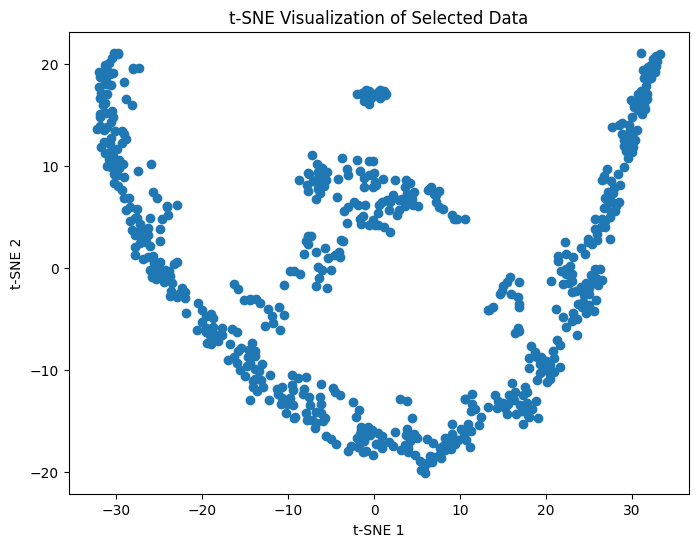

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



# Select and set up the data
selected_data = merged_data.iloc[:, -3:]



# Applying t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(selected_data)

# Visualizing the results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Selected Data')
plt.show()


k: 3 SSE: 10.768113435675106
Silhouette Score: 0.41576139102601845


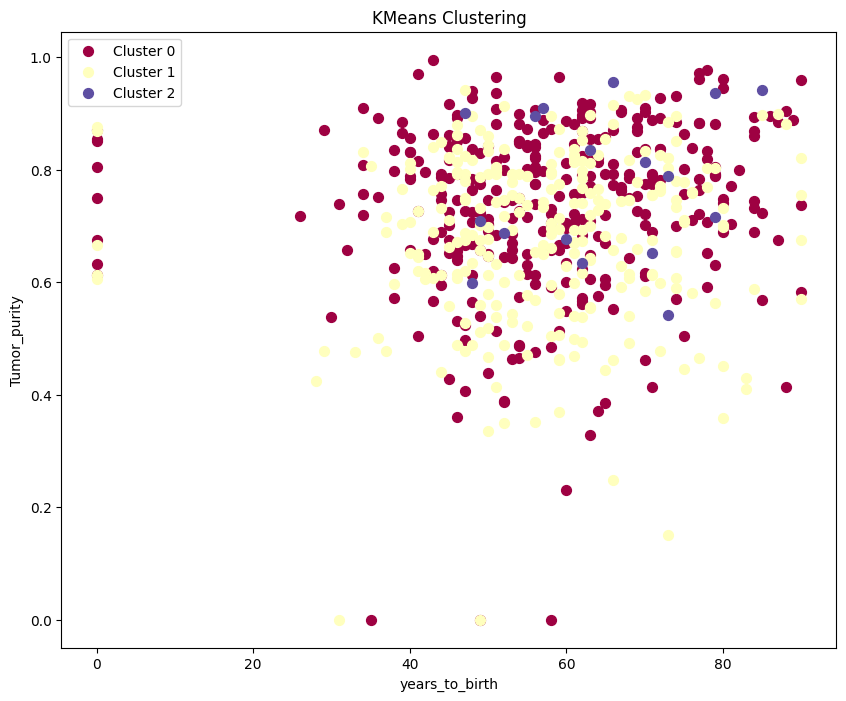

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

k =3

# select data
selected_data = merged_data.iloc[:, -3:]
selected_data.set_index(merged_data["attrib_name"], inplace=True)

standard_scaler = MinMaxScaler()
selected_data_scaled = pd.DataFrame(standard_scaler.fit_transform(selected_data),columns=selected_data.columns)


kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
clusters = kmeans.fit_predict(selected_data_scaled)
print("k: " + str(k) + " SSE: " + str(kmeans.inertia_))

#Silhouette coefficient

# Calculate Silhouette Score
silhouette_avg = silhouette_score(selected_data_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")


merged_data_copy2 = merged_data.copy()

merged_data_copy2.set_index("attrib_name", inplace=True)

merged_data_copy2['cluster'] = clusters


labels = np.unique(clusters)

colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))


feature_x = merged_data_copy2.columns[0]
feature_y = merged_data_copy2.columns[1]

plt.figure(figsize=(10, 8))
for cluster_label, color in zip(labels, colors):
    cluster_data = merged_data_copy2[merged_data_copy2['cluster'] == cluster_label]
    plt.scatter(cluster_data[feature_x], cluster_data[feature_y], color=color, s=50, label=f'Cluster {cluster_label}')

plt.title('KMeans Clustering')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()


k: 1 SSE: 30.616760816942016
k: 2 SSE: 18.195683398578623
k: 3 SSE: 10.768113435675106
k: 4 SSE: 7.100531612152226
k: 5 SSE: 5.143212270721843
k: 6 SSE: 4.045359479947342
k: 7 SSE: 3.3405702658618632
k: 8 SSE: 2.9259539681420104
k: 9 SSE: 2.4999074212767862


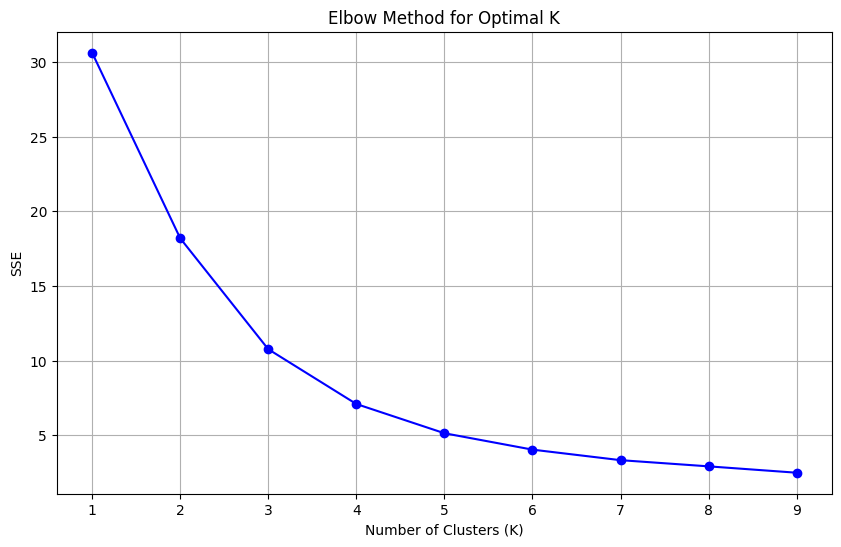

In [ ]:
#elbow method
# Initialize a list to store SSE values for different K
sse = []

# Try different values of K (e.g., from 1 to 10)
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    clusters = kmeans.fit_predict(selected_data_scaled)
    sse.append(kmeans.inertia_)
    print("k: " + str(k) + " SSE: " + str(kmeans.inertia_))

# Plot the SSE values for different K
plt.figure(figsize=(10, 6))
plt.plot(K_range, sse, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [ ]:
attributes = [

    'Tumor_purity',
    'pathology_N_stage',
    'pathology_M_stage',
    'pathology_T_stage',
    'PAM50',
    'ER.Status',
    'PR.Status',
    'HER2.Status',
    'pathology_T_stage',
    'number_of_lymph_nodes',
    'radiation_therapy',
    'pathologic_stage'

]

for attribute in attributes:
    stage_counts = merged_data_copy2.groupby('cluster')[attribute].value_counts()
    stage_counts = stage_counts.unstack(fill_value=0)
    print(stage_counts)

Tumor_purity  0.0000  0.1497  0.2308  0.2489  0.3275  0.3351  0.3501  0.3512  \
cluster                                                                        
0                  3       0       1       0       1       0       0       0   
1                  2       1       0       1       0       1       1       1   
2                  0       0       0       0       0       0       0       0   

Tumor_purity  0.3580  0.3604  ...  0.9548  0.9584  0.9601  0.9611  0.9649  \
cluster                       ...                                           
0                  0       1  ...       0       1       1       1       1   
1                  1       0  ...       0       0       0       0       0   
2                  0       0  ...       1       0       0       0       0   

Tumor_purity  0.9654  0.9698  0.9714  0.9767  0.9955  
cluster                                               
0                  1       1       1       1       1  
1                  0       0       0       0    

In [ ]:

found = False
df = merged_data_copy2.sort_values(by='Tumor_purity')


for value in df['Tumor_purity']:

    count_0_before = len(df[(df['Tumor_purity'] <= value) & (df['cluster'] == 0)])
    count_0_after = len(df[(df['Tumor_purity'] > value) & (df['cluster'] == 0)])
    count_1_before = len(df[(df['Tumor_purity'] <= value) & (df['cluster'] == 1)])
    count_1_after = len(df[(df['Tumor_purity'] > value) & (df['cluster'] == 1)])


    if count_0_before < count_1_before and count_1_after < count_0_after:
        print(f"The value {value} acts as a turning point.")
        found = True
        break

if not found:
    print("No value acts as a turning point.")

The value 0.3501 acts as a turning point.


In [ ]:
# order data as 'number_of_lymph_nodes'
df = merged_data_copy2.sort_values(by='number_of_lymph_nodes')
found = False

# try all the numbers
for value in df['number_of_lymph_nodes']:
    # calculate numbers comes before and after cluster 0 and 1
    count_0_before = len(df[(df['number_of_lymph_nodes'] < value) & (df['cluster'] == 0)])
    count_0_after = len(df[(df['number_of_lymph_nodes'] >= value) & (df['cluster'] == 0)])
    count_1_before = len(df[(df['number_of_lymph_nodes'] < value) & (df['cluster'] == 1)])
    count_1_after = len(df[(df['number_of_lymph_nodes'] >= value) & (df['cluster'] == 1)])

    if count_0_before < count_1_before and count_0_after > count_1_after:
        print(f"The value {value} satisfies the condition.")
        found = True
        break
if not found:
    print("No value satisfies the condition.")

No value satisfies the condition.


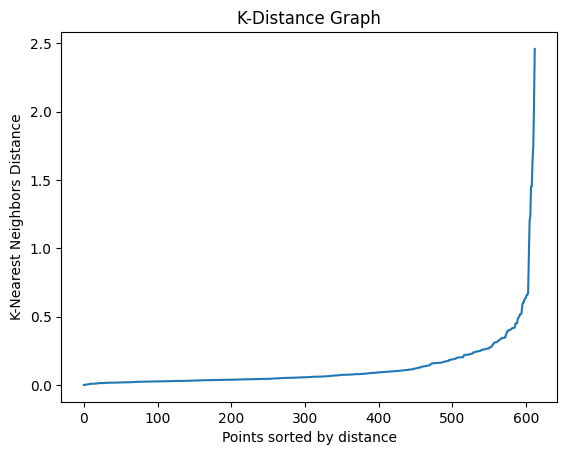

In [ ]:
from sklearn.neighbors import NearestNeighbors
selected_data = merged_data.iloc[:, -3:]
selected_data.set_index(merged_data["attrib_name"], inplace=True)

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(selected_data)
distances, indices = nbrs.kneighbors(selected_data)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.ylabel('K-Nearest Neighbors Distance')
plt.xlabel('Points sorted by distance')
plt.title('K-Distance Graph')
plt.show()


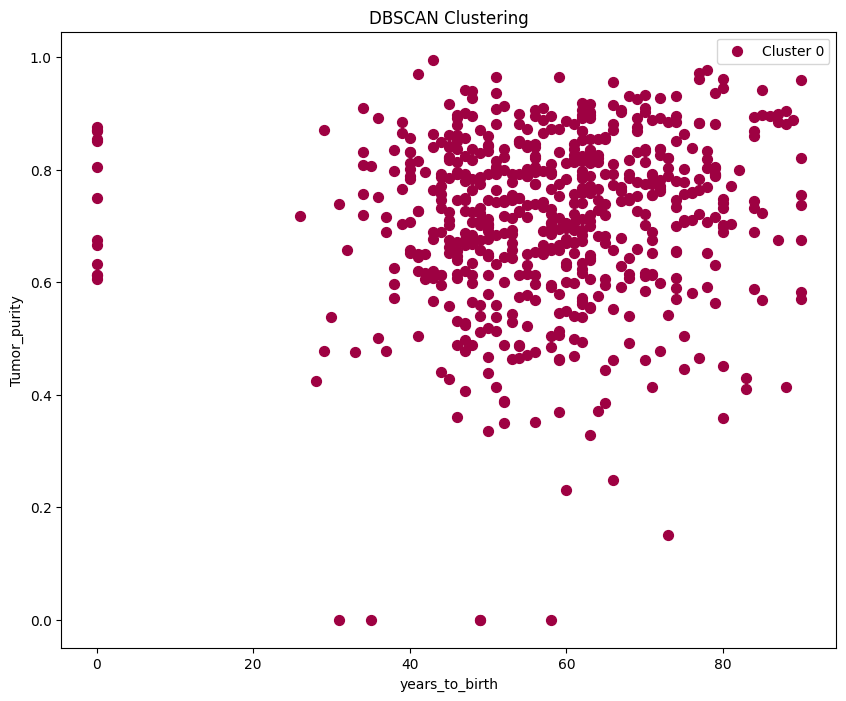

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# select data
selected_data = merged_data.iloc[:, -3:]
selected_data.set_index(merged_data["attrib_name"], inplace=True)
standard_scaler = MinMaxScaler()
selected_data_scaled = pd.DataFrame(standard_scaler.fit_transform(selected_data),columns=selected_data.columns)

# apply DBSCAN for selected_data_scaled
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(selected_data_scaled)


merged_data_copy1 = merged_data.copy()
merged_data_copy1.set_index("attrib_name", inplace=True)
merged_data_copy1['cluster'] = clusters

# get cluster label
labels = np.unique(clusters)

colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# apply top to feature from merged_data_copy1 to visualize
feature_x = merged_data_copy1.columns[0]
feature_y = merged_data_copy1.columns[1]

plt.figure(figsize=(10, 8))
for cluster_label, color in zip(labels, colors):
    if cluster_label == -1:  # noise
        color = 'gray'

    cluster_data = merged_data_copy1[merged_data_copy1['cluster'] == cluster_label]
    plt.scatter(cluster_data[feature_x], cluster_data[feature_y], color=color, s=50, label=f'Cluster {cluster_label}')

plt.title('DBSCAN Clustering')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.show()


In [ ]:
attributes = [
    'pathologic_stage',
    'pathology_N_stage',
    'pathology_M_stage',
    'pathology_T_stage',
    'PAM50',
    'ER.Status',
    'PR.Status',
    'HER2.Status'
]

for attribute in attributes:
    stage_counts = merged_data_copy1.groupby('cluster')[attribute].value_counts()
    stage_counts = stage_counts.unstack(fill_value=0)
    print(stage_counts)


pathologic_stage  No value  stagei  stageii  stageiii  stageiv
cluster                                                       
0                        5     103      346       153        6
pathology_N_stage  No value   n0   n1  n2  n3
cluster                                      
0                        10  281  207  67  48
pathology_M_stage  No value   m0  m1
cluster                             
0                       149  458   6
pathology_T_stage  No value   t1   t2  t3  t4
cluster                                      
0                         2  163  348  82  18
PAM50    Basal  Her2  LumA  LumB  No value
cluster                                   
0           69    29   228   100       187
ER.Status  Negative  No value  Positive
cluster                                
0                 1       603         9
PR.Status  Negative  No value  Positive
cluster                                
0                 2       603         8
HER2.Status  Negative  No value  Positive
cluster      

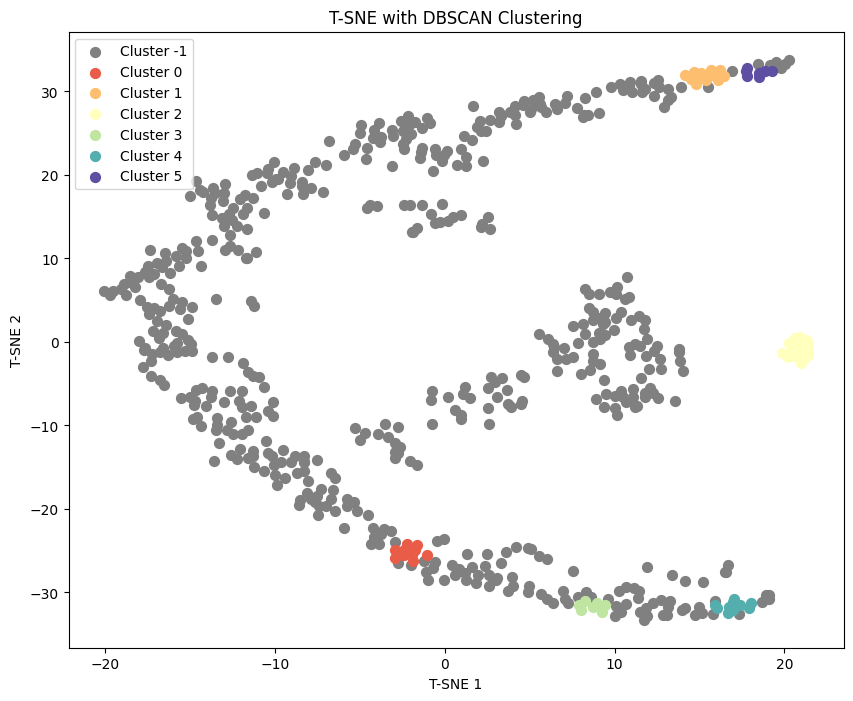

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

selected_data = merged_data.iloc[:, -3:]
selected_data.set_index(merged_data["attrib_name"], inplace=True)

standard_scaler = MinMaxScaler()
selected_data_scaled = pd.DataFrame(standard_scaler.fit_transform(selected_data),columns=selected_data.columns)

# apply T-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_transformed = tsne.fit_transform(selected_data_scaled)

# Use DBSCAN to cluster
dbscan = DBSCAN(eps=0.9, min_samples=7)
clusters = dbscan.fit_predict(tsne_transformed)

# create a copy for merged_data ，add clusters as a new attribute
merged_data_copy = merged_data.copy()
merged_data_copy.set_index("attrib_name", inplace=True)
merged_data_copy['cluster'] = clusters

# get cluster label
labels = np.unique(clusters)

colors = plt.cm.Spectral(np.linspace(0, 1, len(labels)))

# apply T-SNE
plt.figure(figsize=(10, 8))
for cluster_label, color in zip(labels, colors):
    if cluster_label == -1:  # noise
        color = 'gray'

    mask = clusters == cluster_label
    plt.scatter(tsne_transformed[mask, 0], tsne_transformed[mask, 1], color=color, s=50, label=f'Cluster {cluster_label}')

plt.title('T-SNE with DBSCAN Clustering')
plt.xlabel('T-SNE 1')
plt.ylabel('T-SNE 2')
plt.legend()
plt.show()



In [ ]:
merged_data_copy

,years_to_birth,Tumor_purity,pathologic_stage,pathology_T_stage,pathology_N_stage,pathology_M_stage,histological_type,number_of_lymph_nodes,PAM50,ER.Status,...,race,ethnicity,Median_overall_survival,overall_survival,status,overallsurvival,0,1,2,cluster
attrib_name,,,,,,,,,,,,,,,,,,,,,
TCGA.LD.A9QF,73.0,0.1497,stagei,t1,n0,m0,infiltratingductalcarcinoma,0.0,No value,No value,...,blackorafricanamerican,nothispanicorlatino,0.0,323.0,0.0,"323,0",12.365717,10.681247,2.603273e-16,4
TCGA.E9.A5FK,60.0,0.2308,stageiii,t2,n3,m0,infiltratinglobularcarcinoma,10.0,No value,No value,...,white,nothispanicorlatino,0.0,812.0,0.0,"812,0",16.571607,10.394797,5.458103e-16,-1
TCGA.A2.A25F,66.0,0.2489,stageii,t2,n0,m0,infiltratingductalcarcinoma,0.0,Basal,No value,...,white,nothispanicorlatino,0.0,322.0,0.0,"322,0",13.880084,10.394076,-2.649198e-16,-1
TCGA.E9.A2JT,63.0,0.3275,stageii,t2,n0,m0,infiltratinglobularcarcinoma,0.0,LumA,No value,...,white,nothispanicorlatino,0.0,288.0,0.0,"288,0",17.216624,9.910138,5.696426e-16,-1
TCGA.LL.A5YO,50.0,0.3351,stagei,t1,n0,No value,infiltratingductalcarcinoma,0.0,Her2,No value,...,blackorafricanamerican,nothispanicorlatino,0.0,440.0,0.0,"440,0",13.430628,10.586591,-2.210138e-17,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.AC.A6IX,49.0,0.0000,stageiii,t2,n3,No value,infiltratinglobularcarcinoma,19.0,No value,No value,...,white,nothispanicorlatino,0.0,373.0,0.0,"373,0",14.808780,10.959866,4.862482e-16,-1
TCGA.BH.A1ES,35.0,0.0000,stageii,t2,n1,m0,infiltratingductalcarcinoma,1.0,LumA,No value,...,white,nothispanicorlatino,0.0,3462.0,1.0,"3462,1",17.492162,10.588301,-2.677001e-16,-1
TCGA.BH.A1FE,31.0,0.0000,stageii,t2,n1,m0,infiltratingductalcarcinoma,1.0,LumA,No value,...,white,nothispanicorlatino,0.0,2273.0,1.0,"2273,1",14.781907,8.039693,-1.361963e-16,-1


In [ ]:
#print("DBSCAN result: eps: " + str(eps) +", min_samples: "+str(min_samples))

attributes = [
    'pathologic_stage',
    'pathology_N_stage',
    'pathology_M_stage',
    'pathology_T_stage',
    'PAM50',
    'ER.Status',
    'PR.Status',
    'HER2.Status'
]

for attribute in attributes:
    stage_counts = merged_data_copy.groupby('cluster')[attribute].value_counts()
    stage_counts = stage_counts.unstack(fill_value=0)
    print(stage_counts)


pathologic_stage  No value  stagei  stageii  stageiii  stageiv
cluster                                                       
-1                       4      94      307       140        5
 0                       0       2        6         2        0
 1                       0       1       11         0        0
 2                       0       3        9         5        0
 3                       0       1        3         2        1
 4                       0       2        6         2        0
 5                       1       0        4         2        0
pathology_N_stage  No value   n0   n1  n2  n3
cluster                                      
-1                        8  253  182  61  46
 0                        0    7    1   1   1
 1                        1    5    6   0   0
 2                        0    8    7   1   1
 3                        0    2    3   2   0
 4                        0    4    5   1   0
 5                        1    2    3   1   0
pathology_M_stage  